# 1. Initializing method of mu

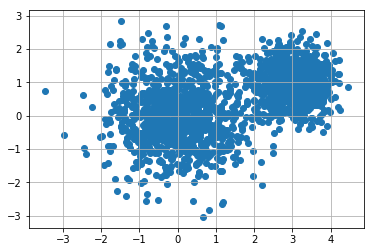

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
#plt.scatter(mu[0][0], mu[0][1], color='red')
#plt.scatter(mu[1][0], mu[1][1], color='red')
plt.grid()

1) fixed point

In [3]:
mu = np.array([[-1,1], [0,-1]])

2) random point

In [4]:
index = np.random.randint(0, len(X_data), size=2)
mu = X_data[index]

#### Exercise1 
3) kmeans++ algorithm 

1. discuss how kmeans++ algorithm works for arbitrary k
2. make your code if k=2 (using the data above)

In [5]:
#step1a
index = np.random.randint(0, len(X_data))
mu = [X_data[index]]
#step1b
idx = np.argmax(np.sum((mu - X_data)**2, axis=1))
mu.append(X_data[idx])

print(mu)

[array([2.80896255, 1.7518062 ]), array([-3.48129239,  0.73932611])]


# 2. Make kmeans code in 1 box!

Assume that.. 
1) the number of clustering k=3, 
2) iterations =10 and 
3) we have randomly initialized center

Result : print J for every iterations

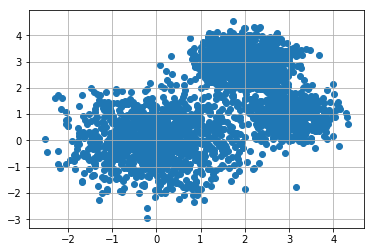

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.grid()

In 1 iteration : 7976.210061688673


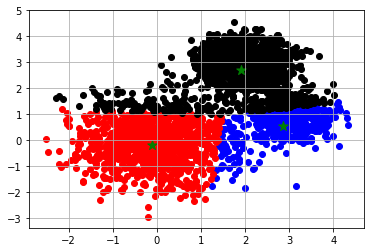

In 2 iteration : 2751.1742323351973


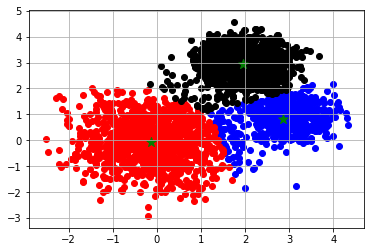

In 3 iteration : 2599.7955805410265


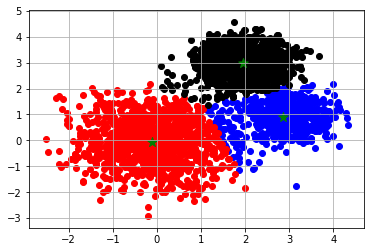

In 4 iteration : 2593.037302149697


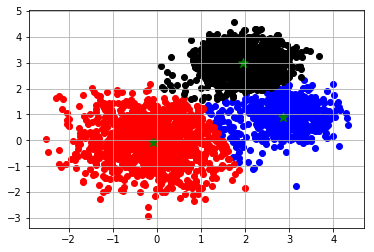

In 5 iteration : 2592.260339753333


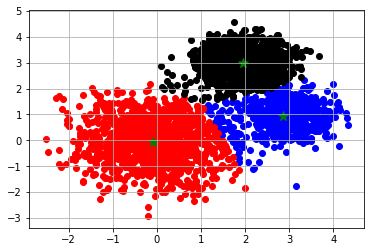

In 6 iteration : 2592.249062049565


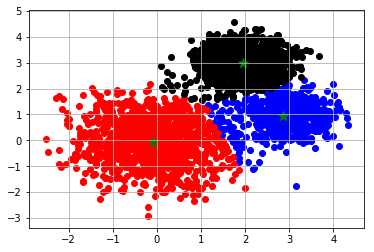

In 7 iteration : 2592.2413440533182


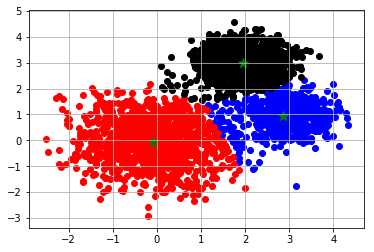

In 8 iteration : 2592.2413440533182


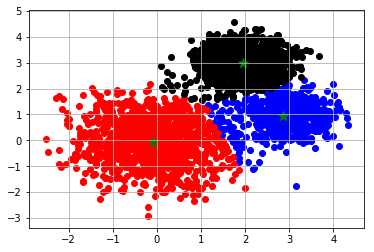

In 9 iteration : 2592.2413440533182


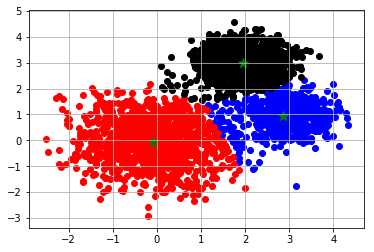

In 10 iteration : 2592.2413440533182


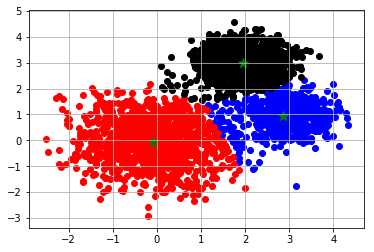

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')


# parameters
k = 3
iterations = 10




#step1) initialize center
index = np.random.randint(0, len(X_data), size=k)
mu = X_data[index]


for i in range(iterations):

    
    #step2) clustering
    a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1)).reshape(-1,1)
    b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1)).reshape(-1,1)
    c = np.sqrt(np.sum((X_data - mu[2])**2, axis=1)).reshape(-1,1)
    dist = np.vstack([a.T, b.T, c.T])
    cluster = np.argmin(dist, axis=0)

    
    #step3) find new center
    mu = []
    for l in range(k):
        mu.append(np.average(X_data[cluster==l], axis=0)) 
    
    
    #print loss
    J = np.sum((np.min(dist, axis=0))**2)
    print("In", i+1,"iteration :",J)

    #draw picture
    plt.figure()
    plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
    plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
    plt.scatter(X_data[cluster==2][:,0], X_data[cluster==2][:,1], c='k')
    plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[2][0],mu[2][1], color ='green', marker="*", s=100 )
    plt.grid()
    plt.show()

# 3. Tolerance

#### (1) for statement

In [8]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


#### (2) if statement

In [9]:
money = 3000

if money > 2000:
    print('get a taxi')
elif money <=2000:
    print("take a bus")

get a taxi


#### (3) for and if statement with 'break'

In [10]:
for i in range(10):
    print(i)
    if i==5:
        break

0
1
2
3
4
5


#### (4) Exercise 2 : Make your one-box code with 1e-5 Tolerance with loss function J

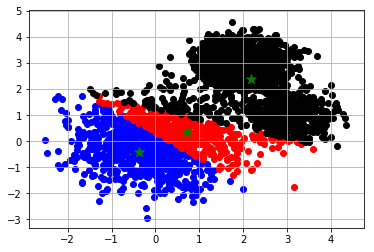

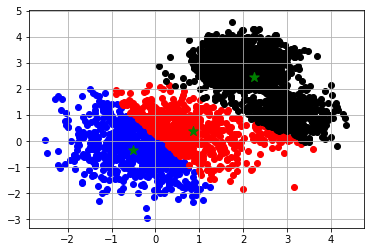

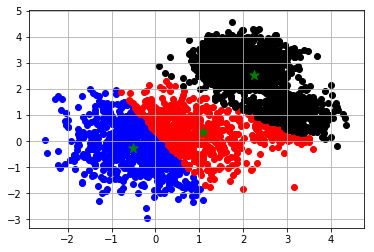

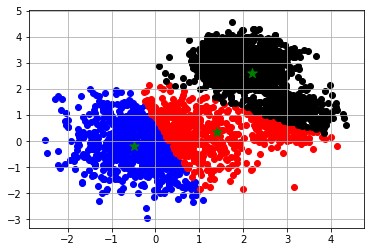

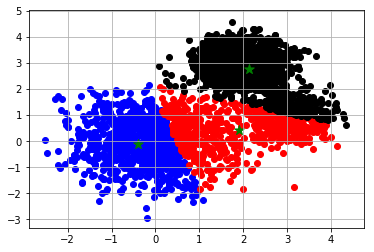

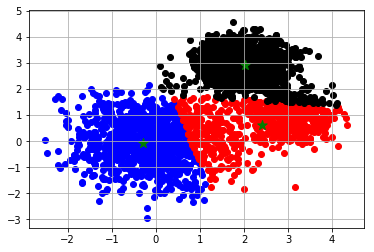

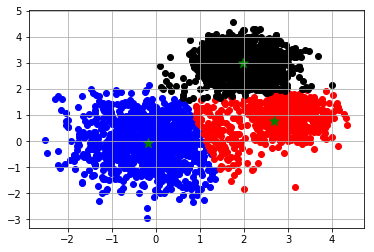

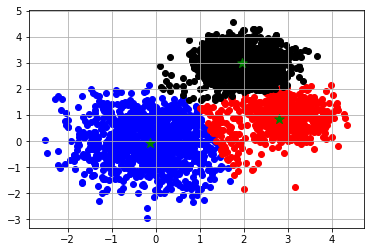

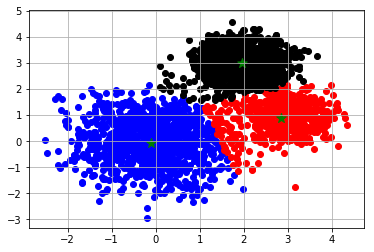

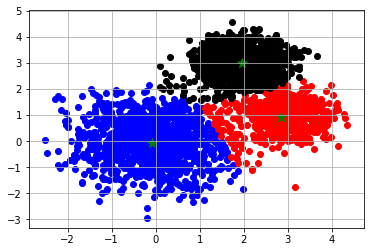

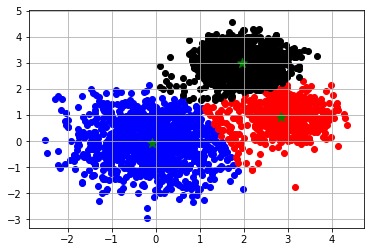

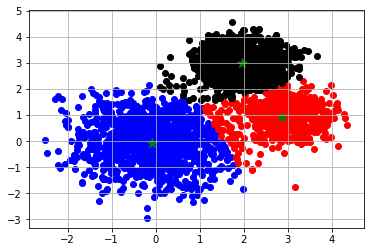

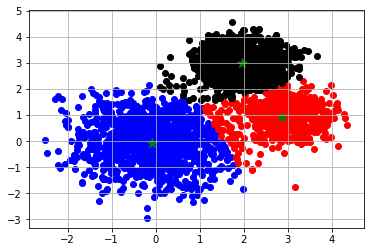

[10009.384374586147, 4034.8867528673463, 3956.9016061653974, 3849.435337299245, 3637.222871961161, 3185.319462765579, 2739.7221129091195, 2618.000033577867, 2597.541268453105, 2592.989035748741, 2592.2652916963652, 2592.2515117661137, 2592.2493390359755, 2592.2493390359755]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')


# parameters
k = 3
iterations = 20
J = []



#step1) initialize center
index = np.random.randint(0, len(X_data), size=k)
mu = X_data[index]


for i in range(iterations):

    
    #step2) clustering
    a = np.sqrt(np.sum((X_data - mu[0])**2, axis=1)).reshape(-1,1)
    b = np.sqrt(np.sum((X_data - mu[1])**2, axis=1)).reshape(-1,1)
    c = np.sqrt(np.sum((X_data - mu[2])**2, axis=1)).reshape(-1,1)
    dist = np.vstack([a.T, b.T, c.T])
    cluster = np.argmin(dist, axis=0)

    
    #step3) find new center
    mu = []
    for l in range(k):
        mu.append(np.average(X_data[cluster==l], axis=0)) 
    
    
    #print loss
    J.append(np.sum((np.min(dist, axis=0))**2))
    
    if i>0:
        if abs(J[i]-J[i-1]) < 1e-5:
            break
    
    #draw picture
    plt.figure()
    plt.scatter(X_data[cluster==0][:,0], X_data[cluster==0][:,1], c='b')
    plt.scatter(X_data[cluster==1][:,0], X_data[cluster==1][:,1], c='r')
    plt.scatter(X_data[cluster==2][:,0], X_data[cluster==2][:,1], c='k')
    plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
    plt.scatter(mu[2][0],mu[2][1], color ='green', marker="*", s=100 )
    plt.grid()
    plt.show()
print(J)    

# 4. Use package : scikit learn

Scikit-learn is a free software machine learning library for the Python programming language. Wikipedia

In [13]:
import numpy as np

X_data = np.load('data.npy')

In [14]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, init='random').fit(X_data)
mu = kmeans_model.cluster_centers_
y_hat = kmeans_model.labels_

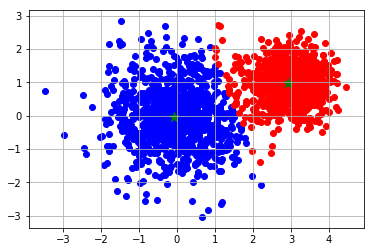

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_data[kmeans_model.labels_==0][:,0], X_data[kmeans_model.labels_==0][:,1], c='b')
plt.scatter(X_data[kmeans_model.labels_==1][:,0], X_data[kmeans_model.labels_==1][:,1], c='r')
plt.scatter(mu[0][0],mu[0][1], color ='green', marker="*", s=100 )
plt.scatter(mu[1][0],mu[1][1], color ='green', marker="*", s=100 )
plt.grid()
plt.show()

### Exercise3 : make 2 models using sklearn!
model 1) cluster=3, iteration=20, tol = 0.0001, initializer = kmeans++

model 2) cluster=3, iteration=20, tol = 0.0001, initializer = random

Result : print mu, labels and the number of iterations run for each initializer

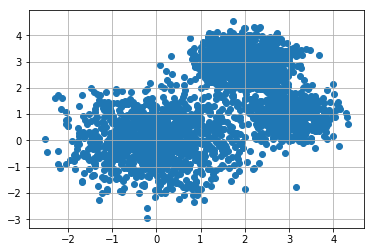

In [16]:
import numpy as np
import matplotlib.pyplot as plt

X_data = np.load('data_3kinds.npy')

plt.figure()
plt.scatter(X_data[:, 0], X_data[:, 1])
plt.grid()

In [17]:
from sklearn.cluster import KMeans

kmeans_model1 = KMeans(n_clusters=3, init='k-means++', max_iter=20, tol=1e-4).fit(X_data)
mu = kmeans_model1.cluster_centers_
y_hat = kmeans_model1.labels_
print(mu, y_hat, kmeans_model1.n_iter_)

kmeans_model2 = KMeans(n_clusters=3, init='random', max_iter=20, tol=1e-4).fit(X_data)
mu = kmeans_model2.cluster_centers_
y_hat = kmeans_model2.labels_
print(mu, y_hat, kmeans_model2.n_iter_)

[[-0.09302499 -0.05960504]
 [ 1.953691    2.99050581]
 [ 2.86168424  0.91977866]] [1 1 2 ... 1 2 1] 4
[[ 1.953691    2.99050581]
 [ 2.86168424  0.91977866]
 [-0.09302499 -0.05960504]] [0 0 1 ... 0 1 0] 16
